In [ ]:
BBC, CBS, CNN, Fox, and New York times

Summary of trends

Your final Jupyter notebook must:


Pull last 100 tweets from each outlet.
Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
Pull into a DataFrame the tweet's source account, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
Export the data in the DataFrame into a CSV file.
Save PNG images for each plot.


As final considerations:


You must complete your analysis using a Jupyter notebook.
You must use the Matplotlib or Pandas plotting libraries.
Include a written description of three observable trends based on the data.
Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.


In [16]:
# Dependencies

%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import tweepy
import json
import numpy as np
from datetime import datetime
import csv
from config import (consumer_key, consumer_secret, 
                    access_token, access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [17]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [52]:
# Target User Accounts
#target_users = ("@FoxNews", "@BBC", "@CNN", "@nytimes", "@CBS")



In [18]:
# Target User Account

target_user = "@FoxNews"

sentiments1 = []

# Counter
counter = 1

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1, 6):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=x)

    for tweet in public_tweets:
        
        #raw_time = tweet["created_at"]
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into a list
        sentiments1.append({
                        "Date": tweet["created_at"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg,
                        "Tweets ago": counter})
        
    # Print Tweets
        print(f'Tip {counter}: {tweet["text"]}')
        
    # Add to Counter
        counter += 1 
        
    # Utilize JSON dumps to generate a pretty-printed json
        print(json.dumps(tweet, sort_keys=True, indent=4))
        
    
# Confirm tweet counts
#len(tweet_times)
        
            

Tip 1: Jeremy Hunt: "We need to make sure that if we are taking sanctions against a country in one area, we're not also ma… https://t.co/vEu4kyL3bw
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Thu Jul 12 23:20:12 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/1\u2026",
                "expanded_url": "https://twitter.com/i/web/status/1017549212672778240",
                "indices": [
                    117,
                    140
                ],
                "url": "https://t.co/vEu4kyL3bw"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 42,
    "favorited": false,
    "geo": null,
    "id": 1017549212672778240,
    "id_str": "1017549212672778240",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_re

Tip 41: Faulkner Presses House Dem: How Can Strzok Prove He Wasn't Acting on Anti-Trump Bias? https://t.co/5EMnTbAN2G
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Thu Jul 12 19:29:07 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "insider.foxnews.com/2018/07/12/fau\u2026",
                "expanded_url": "http://insider.foxnews.com/2018/07/12/faulkner-presses-house-democrat-how-can-strzok-prove-he-wasnt-acting-anti-trump-bias",
                "indices": [
                    86,
                    109
                ],
                "url": "https://t.co/5EMnTbAN2G"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 321,
    "favorited": false,
    "geo": null,
    "id": 1017491059801317376,
    "id_str": "1017491059801317376",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": n

Tip 81: RT @FoxNewsResearch: Peter Strzok:
•Lead FBI agent in Clinton, Russia probes
•Ousted by Mueller for anti-Trump texts
•6/15: Escorted from F…
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Thu Jul 12 15:05:23 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [],
        "user_mentions": [
            {
                "id": 36397873,
                "id_str": "36397873",
                "indices": [
                    3,
                    19
                ],
                "name": "Fox News Research",
                "screen_name": "FoxNewsResearch"
            }
        ]
    },
    "favorite_count": 0,
    "favorited": false,
    "geo": null,
    "id": 1017424691470983168,
    "id_str": "1017424691470983168",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_reply_to_user_id_str": null,
    "is_quote_st

In [19]:
# Convert sentiments to DataFrame
sentiments1_df = pd.DataFrame.from_dict(sentiments1)
sentiments1_df.head()

Compound                            Date  Negative  Neutral  Positive  \
0    0.3182  Thu Jul 12 23:20:12 +0000 2018     0.905    0.000     0.095   
1    0.4404  Thu Jul 12 23:16:37 +0000 2018     0.813    0.000     0.187   
2    0.4215  Thu Jul 12 23:15:49 +0000 2018     0.823    0.000     0.177   
3   -0.3566  Thu Jul 12 23:15:12 +0000 2018     0.816    0.184     0.000   
4   -0.5267  Thu Jul 12 23:02:16 +0000 2018     0.825    0.175     0.000   

   Tweets ago  
0           1  
1           2  
2           3  
3           4  
4           5

In [20]:
# Target User Account

target_user = "@BBC"
sentiments2 = []

# Counter
#counter = 1

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1, 6):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=x)

    for tweet in public_tweets:
        
        raw_time = tweet["created_at"]
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into a list
        sentiments2.append({
                        "Date": tweet["created_at"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg,
                        "Tweets ago": counter})
    # Print Tweets
        print(f'Tip {counter}: {tweet["text"]}')
        
    # Add to Counter
        #counter = counter += 1
        
    # Utilize JSON dumps to generate a pretty-printed json
        print(json.dumps(tweet, sort_keys=True, indent=4))

Tip 101: 😺🎬 Meet Lisio, the ginger cat who jumped onto his owner's shoulders during a serious TV interview.

👉… https://t.co/7DmhNcHnU6
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Thu Jul 12 20:02:02 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/1\u2026",
                "expanded_url": "https://twitter.com/i/web/status/1017499345678143488",
                "indices": [
                    103,
                    126
                ],
                "url": "https://t.co/7DmhNcHnU6"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 24,
    "favorited": false,
    "geo": null,
    "id": 1017499345678143488,
    "id_str": "1017499345678143488",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_reply_to_user_

Tip 101: RT @5liveSport: Only three men have ever scored for #ENG in a semi-final of a #WorldCup

⚽ Sir Bobby Charlton
⚽ @GaryLineker
⚽ Kieran Tripp…
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Wed Jul 11 19:16:46 +0000 2018",
    "entities": {
        "hashtags": [
            {
                "indices": [
                    52,
                    56
                ],
                "text": "ENG"
            },
            {
                "indices": [
                    78,
                    87
                ],
                "text": "WorldCup"
            }
        ],
        "symbols": [],
        "urls": [],
        "user_mentions": [
            {
                "id": 425989199,
                "id_str": "425989199",
                "indices": [
                    3,
                    14
                ],
                "name": "BBC 5 live Sport",
                "screen_name": "5liveSport"
            },
            {
               

Tip 101: Take a look at the rollercoaster years at Nokia, a company that dominated a nation. 

The Rise and Fall of Nokia |… https://t.co/7uflzUaeTj
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Tue Jul 10 19:04:02 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/1\u2026",
                "expanded_url": "https://twitter.com/i/web/status/1016759970635886593",
                "indices": [
                    116,
                    139
                ],
                "url": "https://t.co/7uflzUaeTj"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 16,
    "favorited": false,
    "geo": null,
    "id": 1016759970635886593,
    "id_str": "1016759970635886593",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_r

Tip 101: Although they're great fun, they're not always great for the environment... 

Here's how to go to a festival withou… https://t.co/tvnMfnCrlL
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Mon Jul 09 16:04:04 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/1\u2026",
                "expanded_url": "https://twitter.com/i/web/status/1016352295410454528",
                "indices": [
                    117,
                    140
                ],
                "url": "https://t.co/tvnMfnCrlL"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 57,
    "favorited": false,
    "geo": null,
    "id": 1016352295410454528,
    "id_str": "1016352295410454528",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_

Tip 101: ✊🛍🛒 This family have changed their shopping habits to reduce their plastic footprint.
#PlasticsAction https://t.co/RL3U1Vk7EN
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sun Jul 08 20:05:00 +0000 2018",
    "entities": {
        "hashtags": [
            {
                "indices": [
                    86,
                    101
                ],
                "text": "PlasticsAction"
            }
        ],
        "media": [
            {
                "display_url": "pic.twitter.com/RL3U1Vk7EN",
                "expanded_url": "https://twitter.com/BBC/status/1016050538948022272/video/1",
                "id": 1014823355243954176,
                "id_str": "1014823355243954176",
                "indices": [
                    102,
                    125
                ],
                "media_url": "http://pbs.twimg.com/amplify_video_thumb/1014823355243954176/img/CCVKr1OxPk2BalDw.jpg",
                "media_url_https": "https://pbs.t

In [21]:
# Convert sentiments to DataFrame
sentiments2_df = pd.DataFrame.from_dict(sentiments2)
sentiments2_df.head()

Compound                            Date  Negative  Neutral  Positive  \
0   -0.0772  Thu Jul 12 20:02:02 +0000 2018     0.929    0.071     0.000   
1    0.6249  Thu Jul 12 18:04:07 +0000 2018     0.785    0.000     0.215   
2   -0.0258  Thu Jul 12 17:03:06 +0000 2018     0.539    0.215     0.246   
3    0.0000  Thu Jul 12 16:03:02 +0000 2018     1.000    0.000     0.000   
4    0.6597  Thu Jul 12 14:47:18 +0000 2018     0.512    0.178     0.310   

   Tweets ago  
0         101  
1         101  
2         101  
3         101  
4         101

In [22]:
# Target User Account

target_user = "@CNN"
sentiments3 = []


# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1, 6):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=x)

    for tweet in public_tweets:
        
        raw_time = tweet["created_at"]
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into a list
        sentiments3.append({
                        "Date": tweet["created_at"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg,
                        "Tweets ago": counter})
    # Print Tweets
        print(f'Tip {counter}: {tweet["text"]}')
        
    
        
    # Utilize JSON dumps to generate a pretty-printed json
        print(json.dumps(tweet, sort_keys=True, indent=4))

Tip 101: The first underwater museum in the United States has opened off the coast of northwest Florida… https://t.co/2xPgi2E0I0
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Thu Jul 12 23:21:00 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/1\u2026",
                "expanded_url": "https://twitter.com/i/web/status/1017549415316369413",
                "indices": [
                    96,
                    119
                ],
                "url": "https://t.co/2xPgi2E0I0"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 82,
    "favorited": false,
    "geo": null,
    "id": 1017549415316369413,
    "id_str": "1017549415316369413",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_reply_to_user_id_str":

Tip 101: The House hearing with FBI agent Peter Strzok erupted into a shouting match after Texas GOP Rep. Louie Gohmert dire… https://t.co/4PNbWRU56J
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Thu Jul 12 20:41:11 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/1\u2026",
                "expanded_url": "https://twitter.com/i/web/status/1017509195745251331",
                "indices": [
                    117,
                    140
                ],
                "url": "https://t.co/4PNbWRU56J"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 438,
    "favorited": false,
    "geo": null,
    "id": 1017509195745251331,
    "id_str": "1017509195745251331",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in

Tip 101: "Roseanne," which was canceled in May by ABC after star Roseanne Barr's much-publicized racist Twitter rant, just s… https://t.co/ZwK8G8kVWJ
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Thu Jul 12 18:10:04 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/1\u2026",
                "expanded_url": "https://twitter.com/i/web/status/1017471167773454336",
                "indices": [
                    117,
                    140
                ],
                "url": "https://t.co/ZwK8G8kVWJ"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 206,
    "favorited": false,
    "geo": null,
    "id": 1017471167773454336,
    "id_str": "1017471167773454336",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in

Tip 101: President Trump arrives in the UK. He'll start his day there visiting with British Prime Minister Theresa May.

Fol… https://t.co/BH5IRamA91
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Thu Jul 12 13:18:58 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/1\u2026",
                "expanded_url": "https://twitter.com/i/web/status/1017397907513896960",
                "indices": [
                    117,
                    140
                ],
                "url": "https://t.co/BH5IRamA91"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 150,
    "favorited": false,
    "geo": null,
    "id": 1017397907513896960,
    "id_str": "1017397907513896960",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in

In [23]:
sentiments3_df = pd.DataFrame.from_dict(sentiments3)
sentiments3_df.head()

Compound                            Date  Negative  Neutral  Positive  \
0    0.4215  Thu Jul 12 23:21:00 +0000 2018     0.851    0.000     0.149   
1   -0.3400  Thu Jul 12 23:12:25 +0000 2018     0.738    0.180     0.082   
2    0.0000  Thu Jul 12 23:01:09 +0000 2018     1.000    0.000     0.000   
3    0.6728  Thu Jul 12 22:52:33 +0000 2018     0.610    0.096     0.294   
4    0.7430  Thu Jul 12 22:41:02 +0000 2018     0.741    0.000     0.259   

   Tweets ago  
0         101  
1         101  
2         101  
3         101  
4         101

In [24]:
# Target User Account

target_user = "@nytimes"
sentiments4 = []

# Counter
#counter = 1

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1, 6):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=x)

    for tweet in public_tweets:
        
        raw_time = tweet["created_at"]
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into a list
        sentiments4.append({
                        "Date": tweet["created_at"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg,
                        "Tweets ago": counter})
    # Print Tweets
        print(f'Tip {counter}: {tweet["text"]}')
        
    # Add to Counter
        #counter = counter += 1
        
    # Utilize JSON dumps to generate a pretty-printed json
        print(json.dumps(tweet, sort_keys=True, indent=4))

Tip 101: RT @nytimesarts: Sandra Oh talks about being the first Asian woman nominated for Lead Actress in a Drama https://t.co/wT7yw9Cfe9
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Thu Jul 12 23:21:02 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "nyti.ms/2ui3cx0",
                "expanded_url": "https://nyti.ms/2ui3cx0",
                "indices": [
                    105,
                    128
                ],
                "url": "https://t.co/wT7yw9Cfe9"
            }
        ],
        "user_mentions": [
            {
                "id": 1440641,
                "id_str": "1440641",
                "indices": [
                    3,
                    15
                ],
                "name": "New York Times Arts",
                "screen_name": "nytimesarts"
            }
        ]
    },
    "favorite_count": 0,
    "favorited": false,
    "

Tip 101: Alexandria Ocasio-Cortez wrote on Twitter that Joseph Crowley “stood me up for all 3 scheduled concession calls. No… https://t.co/PjA4x4h8vM
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Thu Jul 12 16:20:04 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/1\u2026",
                "expanded_url": "https://twitter.com/i/web/status/1017443485643927552",
                "indices": [
                    117,
                    140
                ],
                "url": "https://t.co/PjA4x4h8vM"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 211,
    "favorited": false,
    "geo": null,
    "id": 1017443485643927552,
    "id_str": "1017443485643927552",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in

Tip 101: RT @katierogers: Trump caused an emergency this morning, then says in an impromptu presser he persuaded NATO allies to kick in more money.…
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Thu Jul 12 13:14:01 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [],
        "user_mentions": [
            {
                "id": 14116915,
                "id_str": "14116915",
                "indices": [
                    3,
                    15
                ],
                "name": "Katie Rogers",
                "screen_name": "katierogers"
            }
        ]
    },
    "favorite_count": 0,
    "favorited": false,
    "geo": null,
    "id": 1017396661574881280,
    "id_str": "1017396661574881280",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_reply_to_user_id_str": null,
    "is_quote_status": fa

In [25]:
sentiments4_df = pd.DataFrame.from_dict(sentiments4)
sentiments4_df.head()

Compound                            Date  Negative  Neutral  Positive  \
0    0.0000  Thu Jul 12 23:21:02 +0000 2018     1.000    0.000       0.0   
1   -0.3612  Thu Jul 12 23:10:08 +0000 2018     0.872    0.128       0.0   
2    0.0000  Thu Jul 12 23:02:03 +0000 2018     1.000    0.000       0.0   
3    0.0000  Thu Jul 12 22:47:02 +0000 2018     1.000    0.000       0.0   
4   -0.3875  Thu Jul 12 22:32:04 +0000 2018     0.884    0.116       0.0   

   Tweets ago  
0         101  
1         101  
2         101  
3         101  
4         101

In [26]:
# Target User Account

target_user = "@CBS"
sentiments5 = []

# Counter
#counter = 1

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1, 6):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=x)

    for tweet in public_tweets:
        
        raw_time = tweet["created_at"]
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into a list
        sentiments5.append({
                        "Date": tweet["created_at"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg,
                        "Tweets ago": counter})
    # Print Tweets
        print(f'Tip {counter}: {tweet["text"]}')
        
    # Add to Counter
        #counter = counter += 1
        
    # Utilize JSON dumps to generate a pretty-printed json
        print(json.dumps(tweet, sort_keys=True, indent=4))

Tip 101: RT @TKOCBS: Prepare to have some major FUN. #TKO starts NOW! https://t.co/i2ftL6GCj5
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Thu Jul 12 01:01:24 +0000 2018",
    "entities": {
        "hashtags": [
            {
                "indices": [
                    44,
                    48
                ],
                "text": "TKO"
            }
        ],
        "media": [
            {
                "display_url": "pic.twitter.com/i2ftL6GCj5",
                "expanded_url": "https://twitter.com/TKOCBS/status/1017211741585854465/photo/1",
                "id": 1017209960025866240,
                "id_str": "1017209960025866240",
                "indices": [
                    61,
                    84
                ],
                "media_url": "http://pbs.twimg.com/tweet_video_thumb/Dh3bEblUwAAzhV1.jpg",
                "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/Dh3bEblUwAAzhV1.jpg",
                "sizes": {
   

Tip 101: Time to make your predictions for #BB20! 👏 Get to know the @CBSBigBrother Houseguests before the big premiere next… https://t.co/jlpIchJ9sk
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Mon Jun 18 20:27:50 +0000 2018",
    "entities": {
        "hashtags": [
            {
                "indices": [
                    34,
                    39
                ],
                "text": "BB20"
            }
        ],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/1\u2026",
                "expanded_url": "https://twitter.com/i/web/status/1008808528859938817",
                "indices": [
                    116,
                    139
                ],
                "url": "https://t.co/jlpIchJ9sk"
            }
        ],
        "user_mentions": [
            {
                "id": 52791522,
                "id_str": "52791522",
                "indices": [
                    

Tip 101: The feeling when you win a Tony. 🙌 Congratulations to Once on This Island for winning Best Revival of a Musical!… https://t.co/UpFCqgBTwh
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Mon Jun 11 02:44:37 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/1\u2026",
                "expanded_url": "https://twitter.com/i/web/status/1006004244384641024",
                "indices": [
                    114,
                    137
                ],
                "url": "https://t.co/UpFCqgBTwh"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 61,
    "favorited": false,
    "geo": null,
    "id": 1006004244384641024,
    "id_str": "1006004244384641024",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_rep

Tip 101: So many feels at the #TonyAwards. Congratulations to @arielstachel for winning Best Featured Actor in a Musical!… https://t.co/m1aRNIHPRK
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Mon Jun 11 01:19:59 +0000 2018",
    "entities": {
        "hashtags": [
            {
                "indices": [
                    21,
                    32
                ],
                "text": "TonyAwards"
            }
        ],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/1\u2026",
                "expanded_url": "https://twitter.com/i/web/status/1005982948745609216",
                "indices": [
                    114,
                    137
                ],
                "url": "https://t.co/m1aRNIHPRK"
            }
        ],
        "user_mentions": [
            {
                "id": 3816011189,
                "id_str": "3816011189",
                "indices": [
            

Tip 101: RT @MichaelJMoritz: "We are all made perfectly and we all belong” - Andrew Garfield #TonyAwards
{
    "contributors": null,
    "coordinates": null,
    "created_at": "Mon Jun 11 00:13:27 +0000 2018",
    "entities": {
        "hashtags": [
            {
                "indices": [
                    84,
                    95
                ],
                "text": "TonyAwards"
            }
        ],
        "symbols": [],
        "urls": [],
        "user_mentions": [
            {
                "id": 239000570,
                "id_str": "239000570",
                "indices": [
                    3,
                    18
                ],
                "name": "Michael J Moritz Jr",
                "screen_name": "MichaelJMoritz"
            }
        ]
    },
    "favorite_count": 0,
    "favorited": false,
    "geo": null,
    "id": 1005966205054619648,
    "id_str": "1005966205054619648",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": nul

In [27]:
sentiments5_df = pd.DataFrame.from_dict(sentiments5)
sentiments5_df.head()

Compound                            Date  Negative  Neutral  Positive  \
0    0.6514  Thu Jul 12 01:01:24 +0000 2018     0.718    0.000     0.282   
1    0.5562  Wed Jul 11 21:44:45 +0000 2018     0.826    0.000     0.174   
2    0.5411  Wed Jul 11 19:09:34 +0000 2018     0.857    0.000     0.143   
3    0.0000  Mon Jul 09 23:55:07 +0000 2018     1.000    0.000     0.000   
4   -0.3818  Mon Jul 09 18:53:34 +0000 2018     0.894    0.106     0.000   

   Tweets ago  
0         101  
1         101  
2         101  
3         101  
4         101

<IPython.core.display.Javascript object>


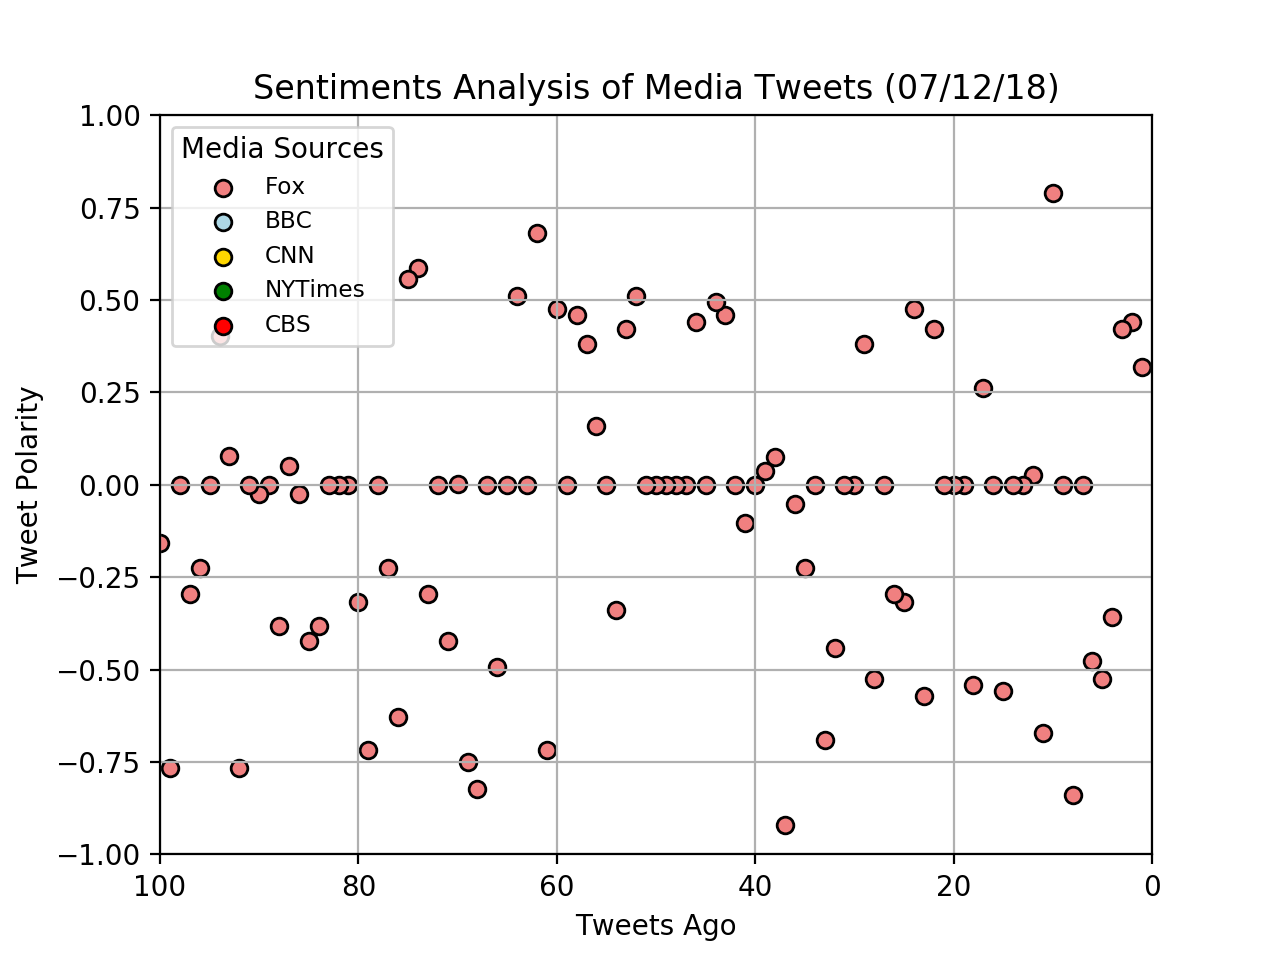

In [43]:
plt.scatter(sentiments1_df["Tweets ago"], sentiments1_df["Compound"], c= "lightcoral", edgecolor = "black", label = "Fox")
plt.scatter(sentiments2_df["Tweets ago"], sentiments2_df["Compound"], c= "lightblue", edgecolor = "black", label = "BBC")
plt.scatter(sentiments3_df["Tweets ago"], sentiments3_df["Compound"], c= "gold", edgecolor = "black", label = "CNN")
plt.scatter(sentiments4_df["Tweets ago"], sentiments4_df["Compound"], c= "green", edgecolor = "black", label = "NYTimes")
plt.scatter(sentiments5_df["Tweets ago"], sentiments5_df["Compound"], c= "red", edgecolor = "black", label = "CBS")

plt.title("Sentiments Analysis of Media Tweets (07/12/18)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim((100,0))
plt.ylim((-1.0, 1.0))
plt.grid(True)

# create the legend
legend = plt.legend(
    fontsize="small",
    mode="Expanded",
    loc="best",
    title="Media Sources"
)

#plt.savefig("twitter_sentiments.png")
plt.show()

In [ ]:
# # Scatter plot data


# sentiments1_df.plot (kind="scatter", x="Tweets ago", y="Compound", c= "lightcoral", edgecolor = "black", label= "Fox")
# #sentiments2_df.plot (kind="scatter", x="Tweets ago", y="Compound", c= "lightblue", edgecolor = "black", label= "BBC")
# #sentiments3_df.plot (kind="scatter", x="Tweets ago", y="Compound", c= "gold", edgecolor = "black", label= "CNN")
# #sentiments4_df.plot (kind="scatter", x="Tweets ago", y="Compound", c= "green", edgecolor = "black", label= "NYTimes")
# #sentiments5_df.plot (kind="scatter", x="Tweets ago", y="Compound", c= "red", edgecolor = "black", label= "CBS")


# # adding labels and adjusting x axis
# plt.title("Sentiments Analysis of Media Tweets (07/12/18)")
# plt.ylabel("Tweet Polarity")
# plt.xlabel("Tweets Ago")
# plt.xlim((100,0))
# plt.ylim((-1.0, 1.0))
# plt.grid(True)

# # create the legend
# legend = plt.legend(
#     fontsize="small",
#     mode="Expanded",
#     loc="best",
#     title="Media Sources"
# )

# #plt.savefig("twitter_sentiments.png")
# plt.show()

In [ ]:
#The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization.
#For this plot, you will again aggregate the compound sentiments analyzed by VADER.



In [ ]:
tweet_polarity1 = sentiments1_df
tweet_polarity2 = sentiments2_df
tweet_polarity3 = sentiments3_df
tweet_polarity4 = sentiments4_df
tweet_polarity5 = sentiments5_df

In [ ]:
x_axis = ["Fox", "BBC", "CNN", "NYTimes", "CBS"]


In [ ]:
plt.bar(tick_locations, tweet_polarity_df['compound'], align="center")
plt.xticks(tick_locations, tweet_polarity_df['news'], rotation=45, ha="right")

In [ ]:
# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, cities)

In [ ]:
# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)

In [ ]:
# Set the limits of the y axis
plt.ylim(0,+0.4)

In [ ]:
# Give the chart a title, x label, and y label
plt.title("Overall Media Sentiment based on Twitter (7/12/18)")
plt.xlabel("News Outlet")
plt.ylabel("Tweet Polarity")

In [15]:
# Export to CSV
sentiments1_pd.to_csv("fox_tweets.csv", index=False)

# View the DataFrame
sentiments1_pd.head()

AttributeError: 'list' object has no attribute 'to_csv'